In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from splitter import splitter  # import your function from splitter.py
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


In [27]:
# Load into DataFrame
file_path = "topic21_v9_train.csv"
df = pd.read_csv(file_path)

In [28]:
# 2. Frame the Problem & Sample Test Set
# Objective: Predict car price (regression) based on features
# Metrics: MSE, RMSE, MAE, R²
# Split off a test set (20%) and never peek at it until evaluation
X_train, X_test, y_train, y_test = splitter(file_path)
print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")

Train shape: (6369, 18), (6369,)
Test shape: (1593, 18), (1593,)


In [29]:
# 3. Explore the Data (EDA)
# Combine features and target for EDA
train_df = pd.concat([X_train, y_train], axis=1)


# 3.1 Quick overview
display(train_df.info())
display(train_df.describe(include='all'))


# 3.2 Missing values
display(train_df.isna().sum())
display((train_df.isna().mean() * 100).round(2))  # percentage missing



<class 'pandas.core.frame.DataFrame'>
Index: 6369 entries, 2864 to 7270
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   0                   5813 non-null   float64
 1   1                   6014 non-null   float64
 2   2                   5716 non-null   float64
 3   3                   5991 non-null   float64
 4   4                   5989 non-null   float64
 5   brand               6369 non-null   object 
 6   model               6369 non-null   object 
 7   trim                6361 non-null   object 
 8   body_type           6369 non-null   object 
 9   fuel_type           6369 non-null   object 
 10  transmission_type   6369 non-null   object 
 11  engine_capacity_cc  5078 non-null   object 
 12  horsepower          6069 non-null   object 
 13  exterior_color      6369 non-null   object 
 14  interior_color      6369 non-null   object 
 15  warranty            6369 non-null   object 
 16  city    

None

,0,1,2,3,4,brand,model,trim,body_type,fuel_type,transmission_type,engine_capacity_cc,horsepower,exterior_color,interior_color,warranty,city,seller_type,price
count,5.813000e+03,6014.000000,5716.000000,5991.000000,5989.000000,6369,6369,6361,6369,6369,6369,5078,6069,6369,6369,6369,6369,6369,6369.000000
unique,NaN,NaN,NaN,NaN,NaN,85,574,713,13,4,2,10,11,17,10,3,8,3,NaN
top,NaN,NaN,NaN,NaN,NaN,Mercedes-Benz,Range Rover,Other,SUV,Petrol,Automatic Transmission,4000+ cc,200 - 299 HP,White,Black,No,Dubai,Dealer,NaN
freq,NaN,NaN,NaN,NaN,NaN,973,179,1253,2914,6087,6195,1061,1557,2002,2161,2647,5333,4092,NaN
mean,2.037749e+06,3.668371,9.294016,0.814258,0.832198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164723.204271
std,1.153898e+08,0.083244,10.151578,8.493506,2.021225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190676.126189
min,2.504974e-01,3.373773,-23.542864,0.144798,-7.274302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000
25%,4.710367e-01,3.610860,5.252979,0.262443,0.029324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44999.000000
50%,6.991350e-01,3.660604,10.889050,0.352959,0.986307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94900.000000
75%,1.203203e+00,3.721478,16.023471,0.516628,1.992085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209900.000000


0                      556
1                      355
2                      653
3                      378
4                      380
brand                    0
model                    0
trim                     8
body_type                0
fuel_type                0
transmission_type        0
engine_capacity_cc    1291
horsepower             300
exterior_color           0
interior_color           0
warranty                 0
city                     0
seller_type              0
price                    0
dtype: int64

0                      8.73
1                      5.57
2                     10.25
3                      5.93
4                      5.97
brand                  0.00
model                  0.00
trim                   0.13
body_type              0.00
fuel_type              0.00
transmission_type      0.00
engine_capacity_cc    20.27
horsepower             4.71
exterior_color         0.00
interior_color         0.00
warranty               0.00
city                   0.00
seller_type            0.00
price                  0.00
dtype: float64

In [30]:
# 3.3 Data types & unique counts
for col in train_df.columns:
    print(f"{col}: {train_df[col].dtype}, {train_df[col].nunique()} unique values")

0: float64, 5813 unique values
1: float64, 6014 unique values
2: float64, 5716 unique values
3: float64, 5991 unique values
4: float64, 5989 unique values
brand: object, 85 unique values
model: object, 574 unique values
trim: object, 713 unique values
body_type: object, 13 unique values
fuel_type: object, 4 unique values
transmission_type: object, 2 unique values
engine_capacity_cc: object, 10 unique values
horsepower: object, 11 unique values
exterior_color: object, 17 unique values
interior_color: object, 10 unique values
warranty: object, 3 unique values
city: object, 8 unique values
seller_type: object, 3 unique values
price: int64, 1167 unique values


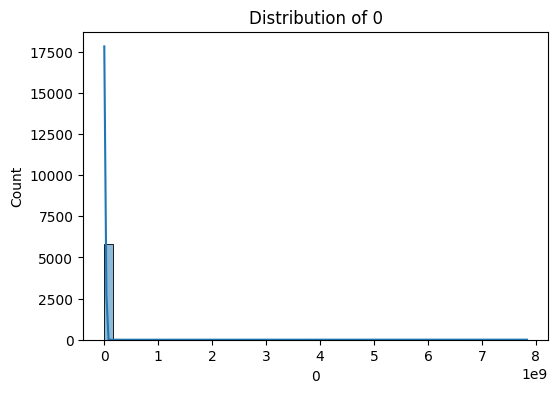

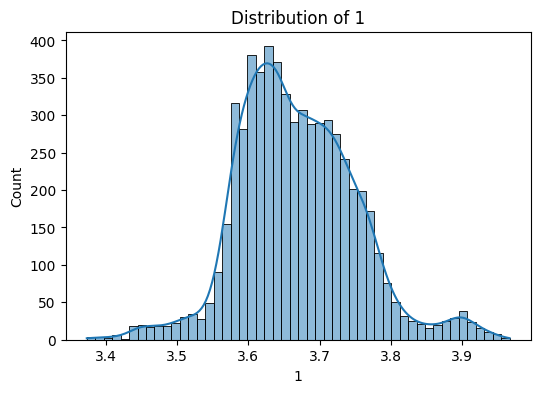

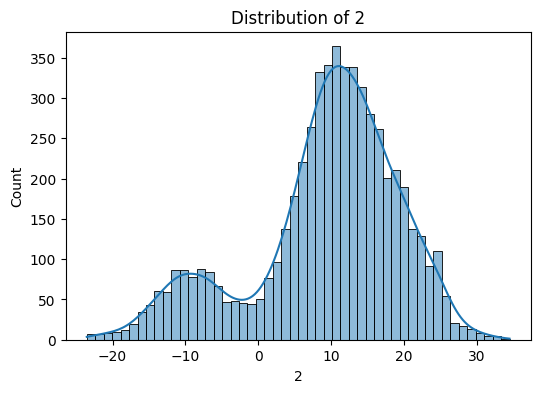

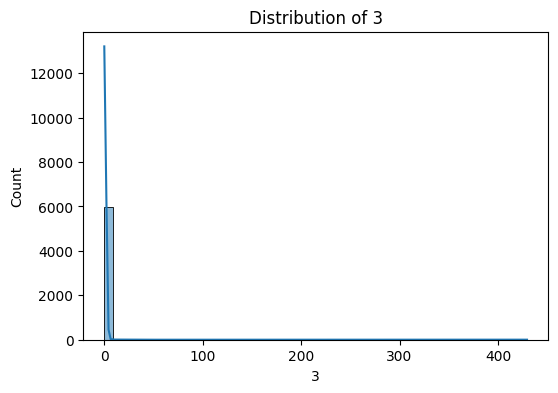

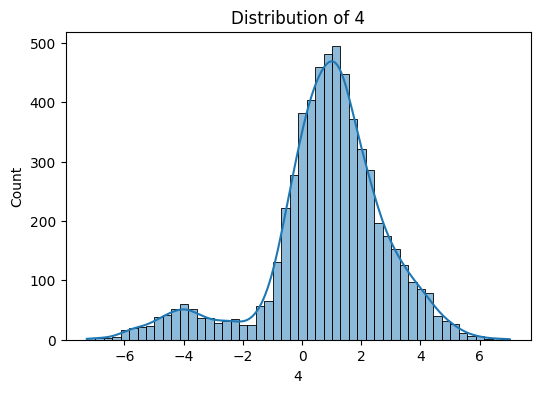

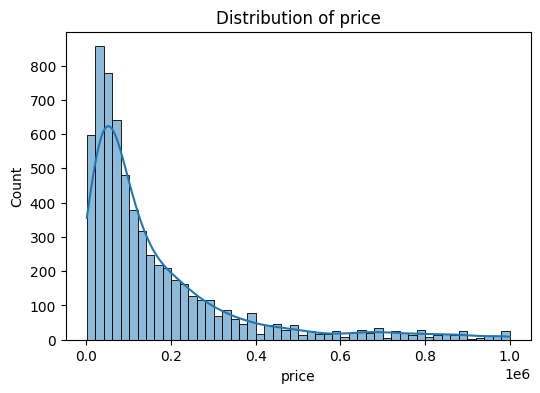

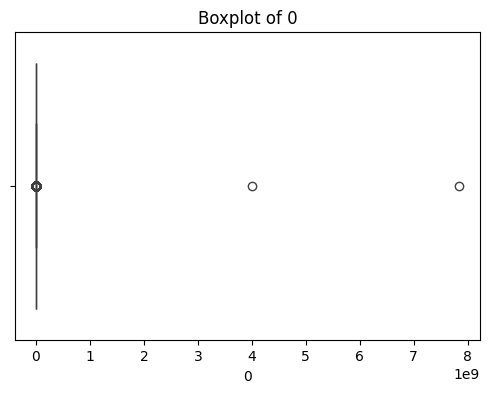

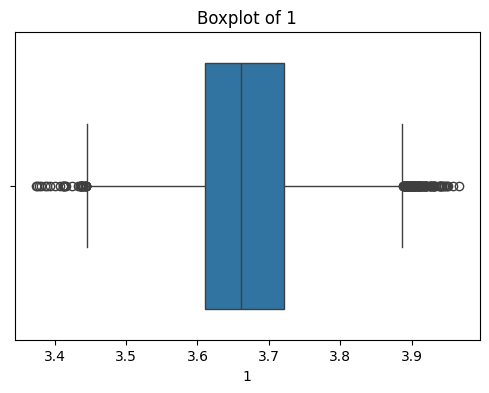

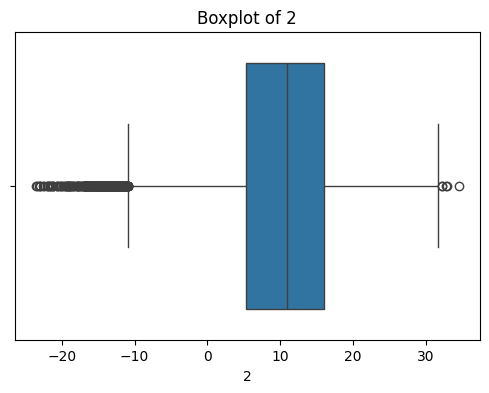

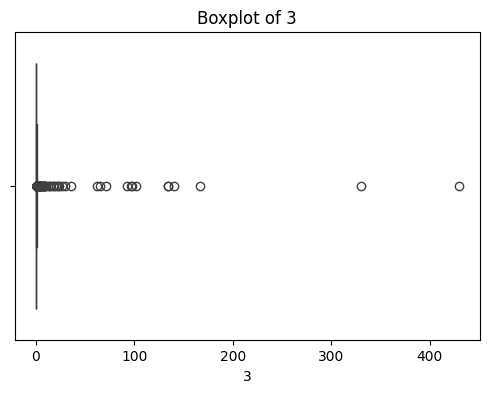

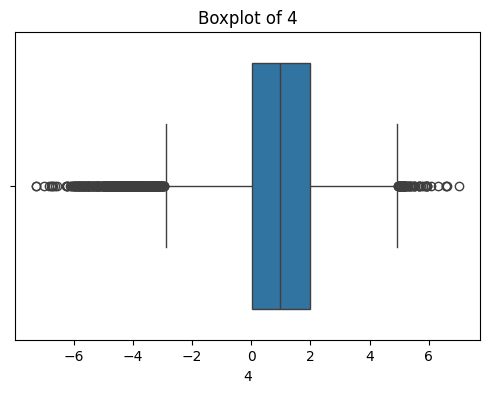

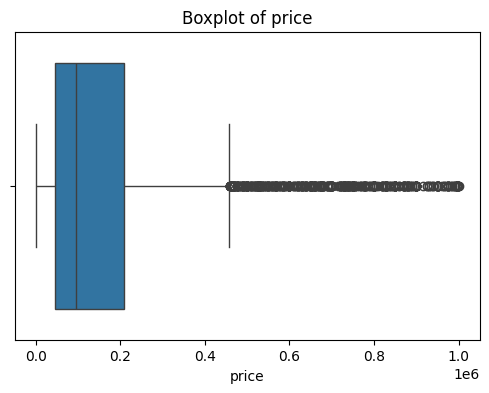

In [31]:
# 3.4 Visualizations

numeric_cols = ['0','1','2','3','4','price']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(train_df[col].dropna(), kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=train_df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.show()

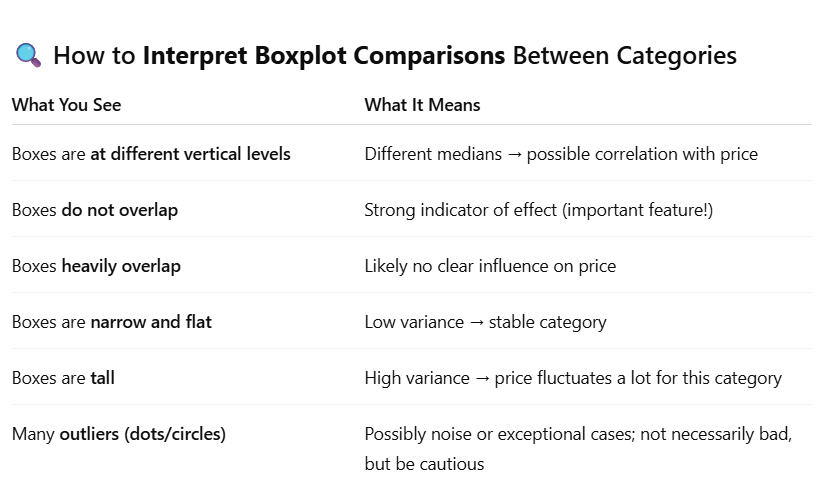

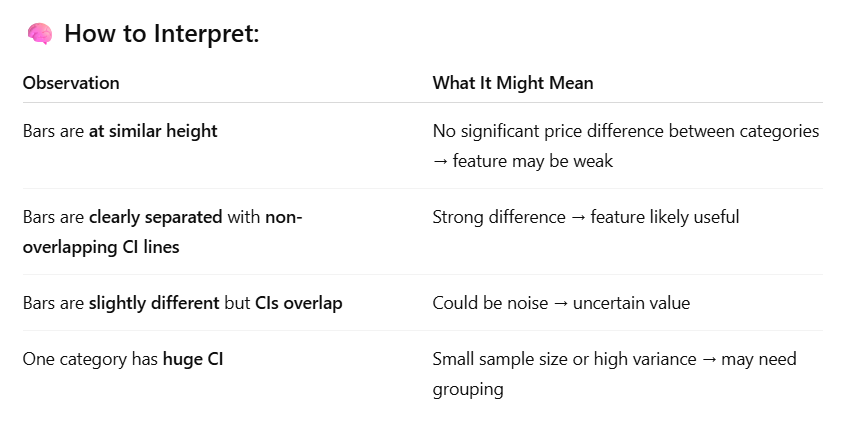

In [32]:
from IPython.display import Image, display
display(Image(filename='screenshot0.png'))
display(Image(filename='screenshot.png'))

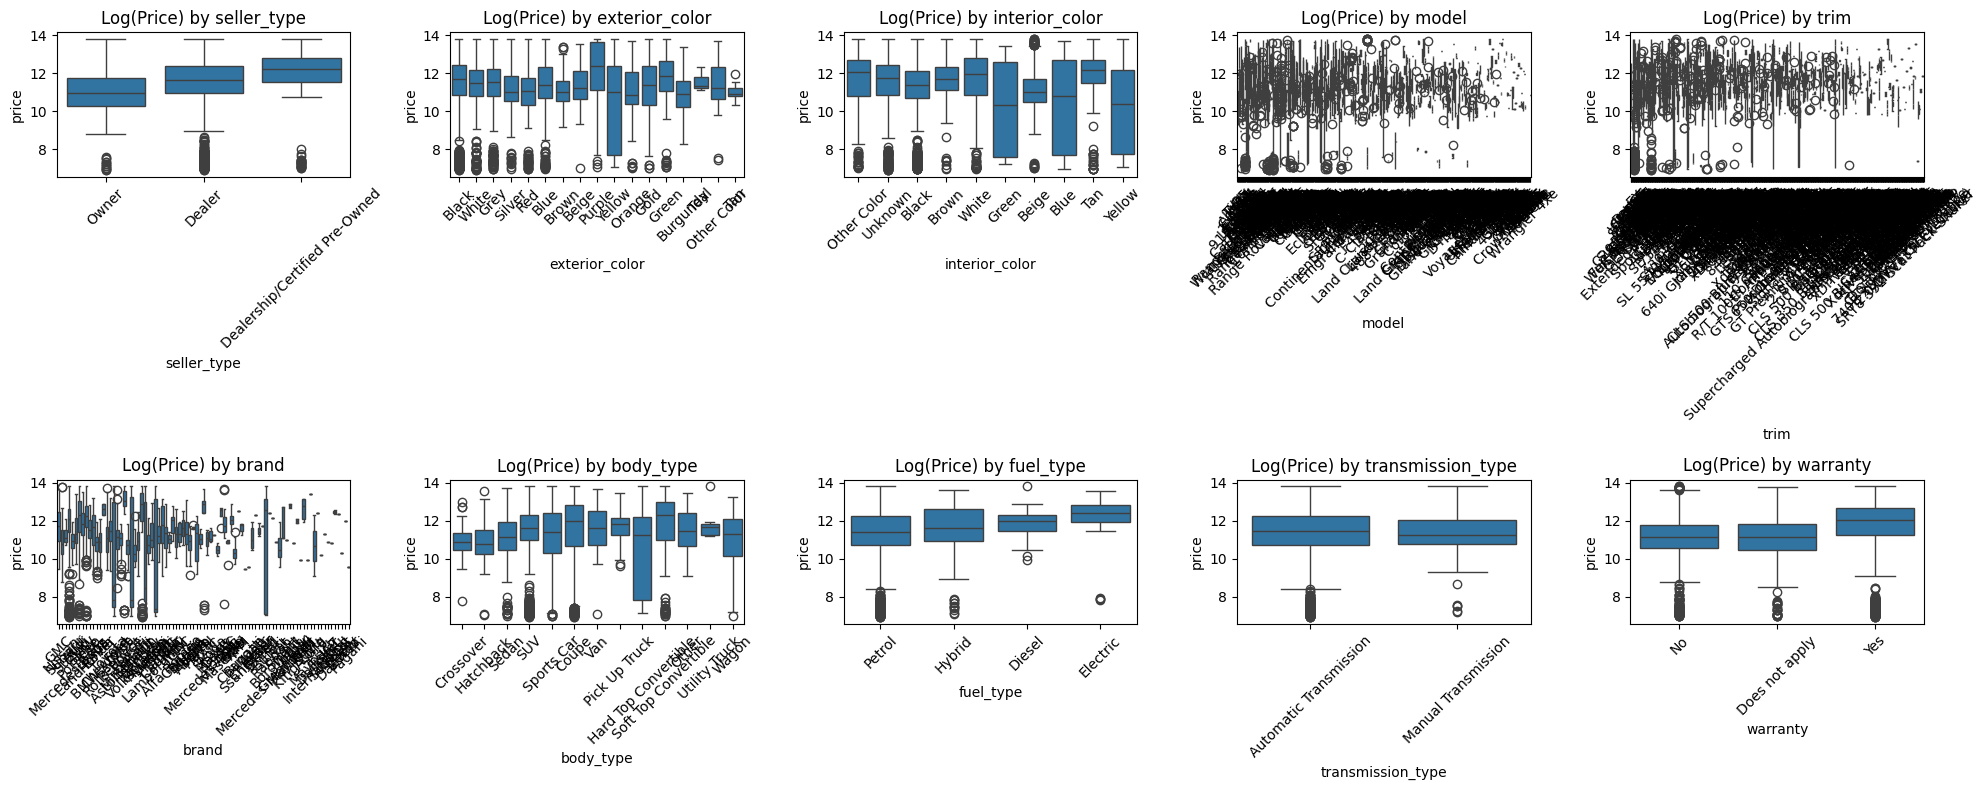

In [8]:
categorical_features = ['seller_type', 'exterior_color', 'interior_color', 'model', 'trim', 'brand', 'body_type', 'fuel_type', 'transmission_type', 'warranty']
n_cols = 5
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8))

axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.boxplot(x=feature, y=np.log1p(train_df['price']), data=train_df, ax=axes[i])
    axes[i].set_title(f'Log(Price) by {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


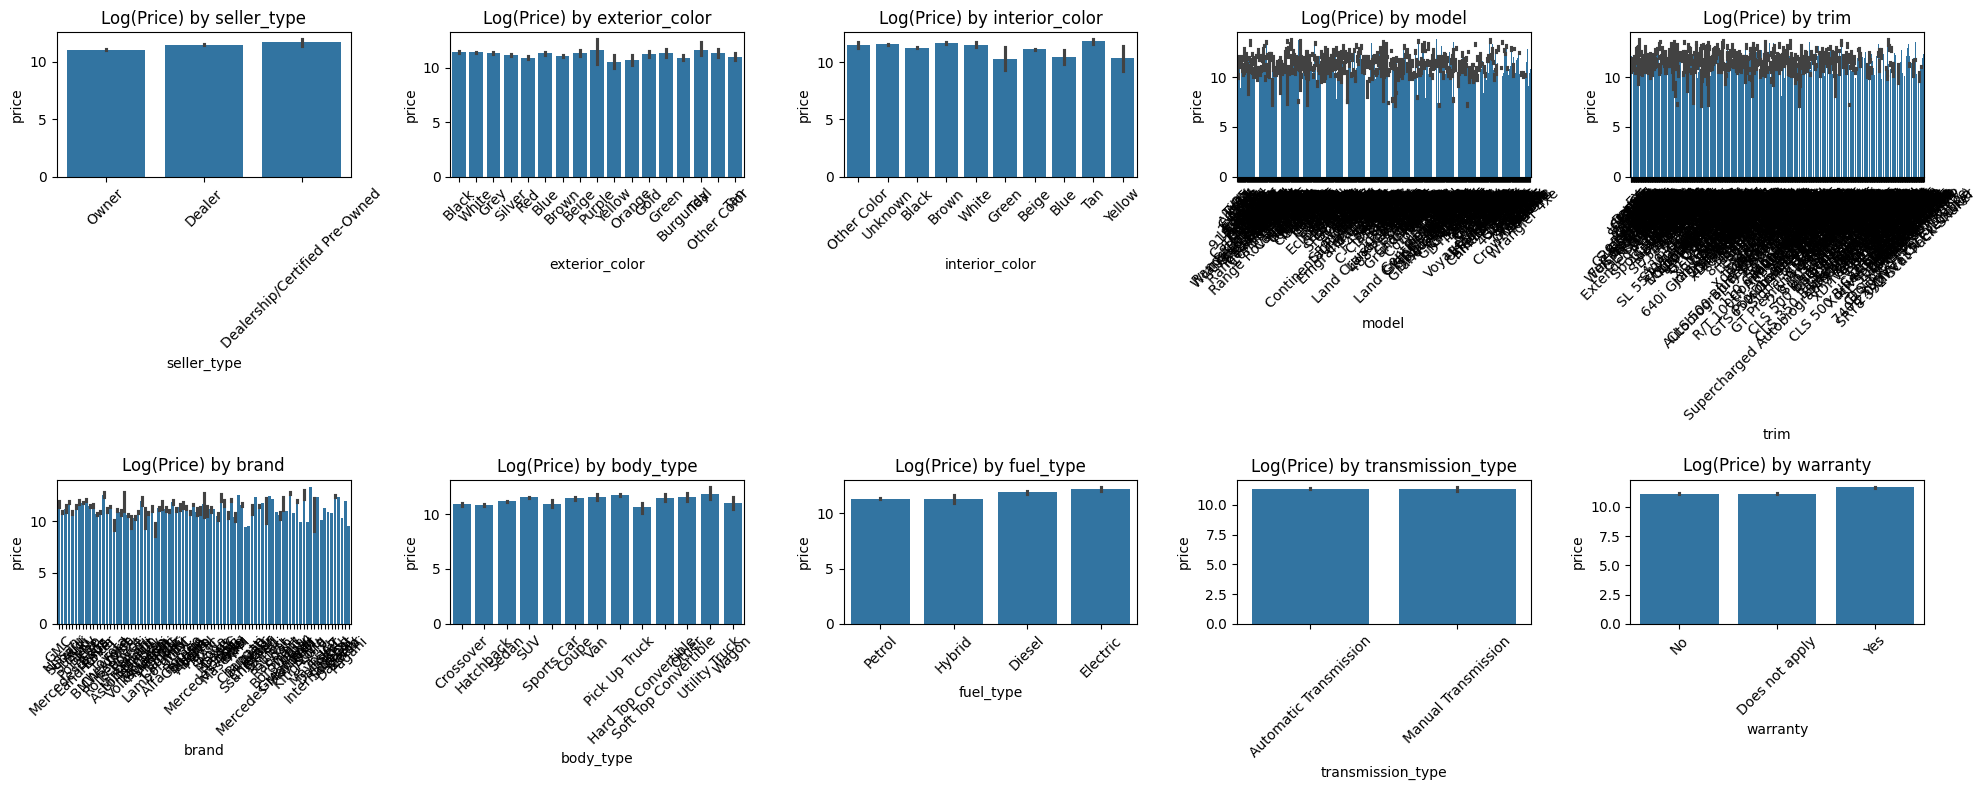

In [33]:
categorical_features = ['seller_type', 'exterior_color', 'interior_color', 'model', 'trim', 'brand', 'body_type', 'fuel_type', 'transmission_type', 'warranty']
n_cols = 5
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8))

axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.barplot(x=feature, y=np.log1p(train_df['price']), data=train_df, ax=axes[i])
    axes[i].set_title(f'Log(Price) by {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

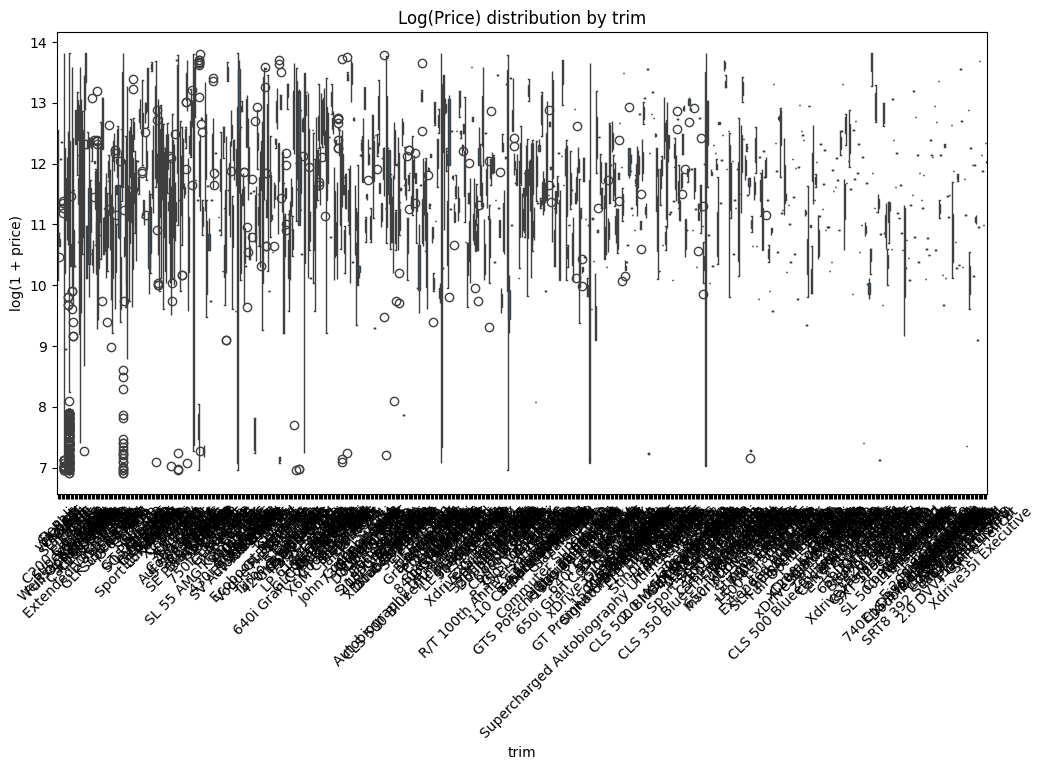

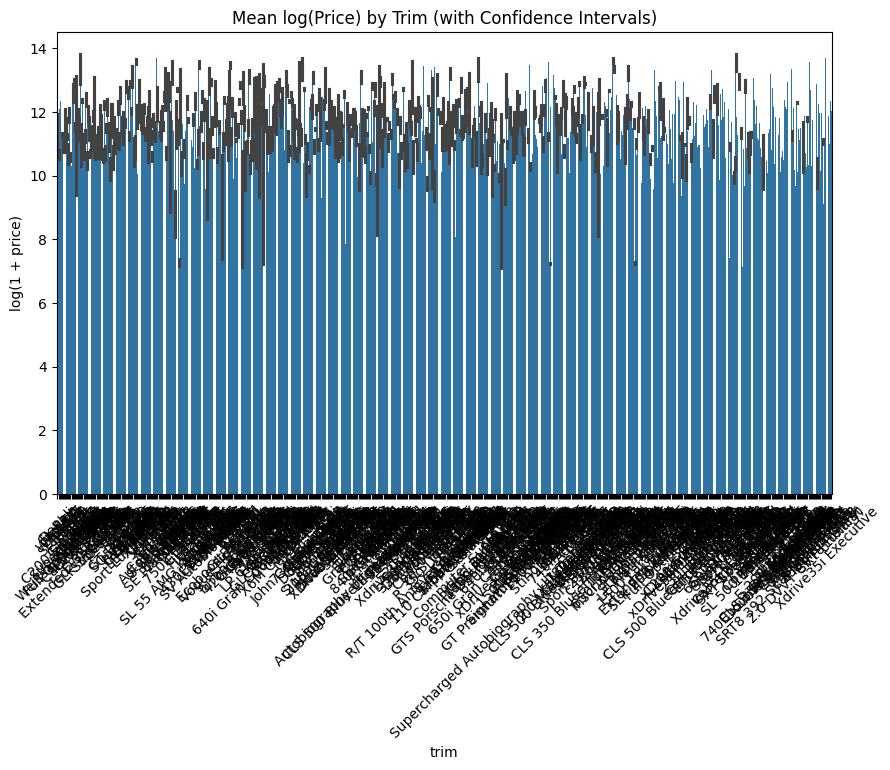

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x='trim', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by trim')
plt.ylabel('log(1 + price)')
plt.show()

#HORRIBLE SIGHT, USELESS, DROP TRIM

plt.figure(figsize=(10, 6))
sns.barplot(x='trim', y=np.log1p(train_df['price']), data=train_df, errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by Trim (with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='exterior_color', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Exterior color')
plt.ylabel('log(1 + price)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='exterior_color', y=np.log1p(train_df['price']), data=train_df, errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by Exterior color (with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='interior_color', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Interior color')
plt.ylabel('log(1 + price)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='interior_color', y=np.log1p(train_df['price']), data=train_df, errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by Interior color (with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='seller_type', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Seller Type')
plt.ylabel('log(1 + price)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='seller_type', y=np.log1p(train_df['price']), data=train_df, errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by Seller Type (with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='brand', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Brand')
plt.ylabel('log(1 + price)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='brand', y=np.log1p(train_df['price']), errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by Brand (with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='model', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Model')
plt.ylabel('log(1 + price)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='model', y=np.log1p(train_df['price']), errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by Model(with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='body_type', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Body Type')
plt.ylabel('log(1 + price)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='body_type', y=np.log1p(train_df['price']), data=train_df, errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by Body Type (with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='fuel_type', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Fuel Type')
plt.ylabel('log(1 + price)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='fuel_type', y=np.log1p(train_df['price']), data=train_df, errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by Fuel Type (with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='transmission_type', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Transmission Type')
plt.ylabel('log(1 + price)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='transmission_type', y=np.log1p(train_df['price']), data=train_df, errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by Transmission Type (with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='warranty', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Warranty')
plt.ylabel('log(1 + price)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='warranty', y=np.log1p(train_df['price']), errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by Warranty(with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='city', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by City')
plt.ylabel('log(1 + price)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='city', y=np.log1p(train_df['price']), errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by City(with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

****Scatterplots for CATEGORICAL features using conversion of categories to numerical positions on the x-axis****

In [ ]:
# categorical_features = [
#     'exterior_color', 'interior_color', 'model', 'trim', 'brand',
#     'body_type', 'fuel_type', 'transmission_type',
#     'warranty', 'city', 'seller_type'
# ]

# # Compute log-transformed target
# log_price = np.log1p(y_train)  # or use np.log(y_train) if no zero prices

# n_cols = 3
# n_rows = int(np.ceil(len(categorical_features) / n_cols))
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
# axes = axes.flatten()

# for i, feature in enumerate(categorical_features):
#     ax = axes[i]
#     categories = X_train[feature].astype(str).unique()
#     cat_to_num = {cat: idx for idx, cat in enumerate(categories)}
#     x = X_train[feature].astype(str).map(cat_to_num)

#     jitter_x = np.random.uniform(-0.2, 0.2, size=len(x))
#     jitter_y = np.random.uniform(-0.3, 0.3, size=len(log_price))
    
#     ax.scatter(x + jitter_x, log_price + jitter_y, alpha=0.1)
#     ax.set_title(f"log(Price) vs {feature}")
#     ax.set_xlabel(feature)
#     ax.set_ylabel("log(1 + Price)")
#     ax.set_xticks(list(cat_to_num.values()))
#     ax.set_xticklabels(list(cat_to_num.keys()), rotation=45, ha='right')

# # Hide unused axes
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()


****Scatterplots for the NUMERICAL values****

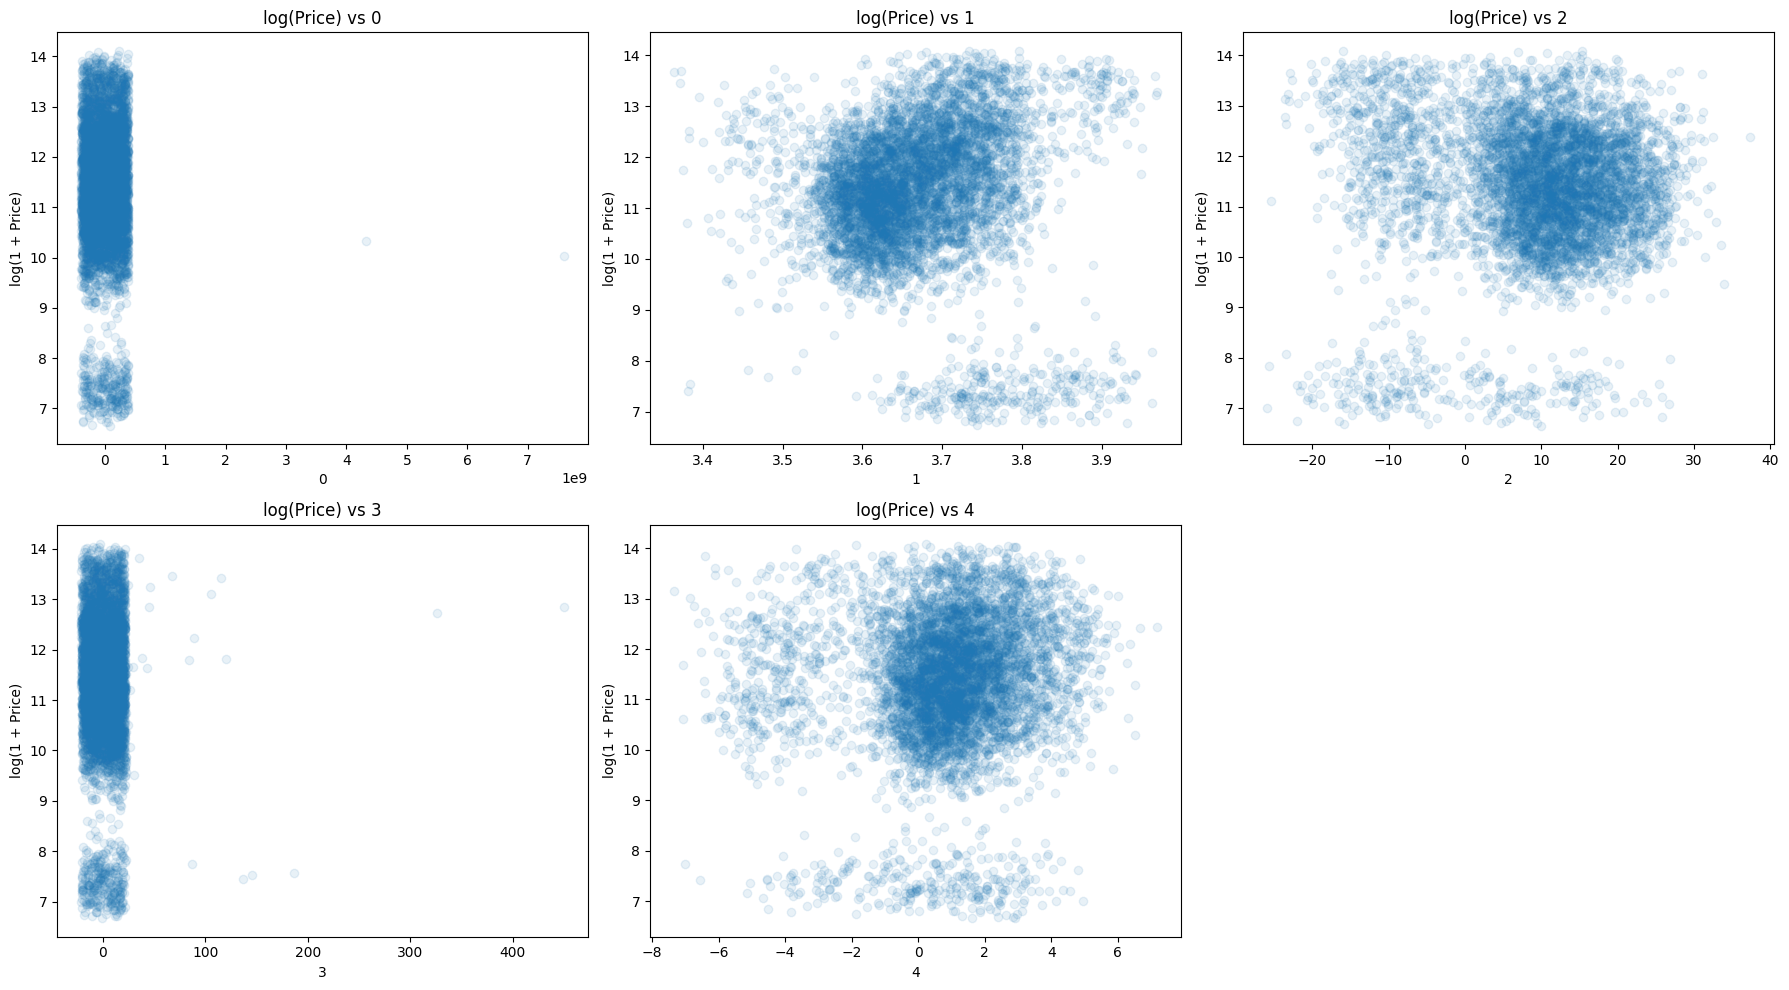

In [39]:
num_features = ['0', '1', '2', '3', '4']
log_price = np.log1p(y_train)  # log(1 + price) to handle zeros safely

n_cols = 3
n_rows = int(np.ceil(len(num_features) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(num_features):
    ax = axes[i]
    x = X_train[feature].astype(float)  # ensure float type

    jitter_x = np.random.uniform(-0.05 * (x.max() - x.min()), 0.05 * (x.max() - x.min()), size=len(x))
    jitter_y = np.random.uniform(-0.3, 0.3, size=len(log_price))

    ax.scatter(x + jitter_x, log_price + jitter_y, alpha=0.1)
    ax.set_title(f"log(Price) vs {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("log(1 + Price)")

# Hide any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


****Grouping rare categories into "Other". This reduces clutter and improves interpretability and model performance.****

In [89]:
def group_rare_categories(df, column, threshold=0.01):
    """
    Replace rare categories in a column with 'Other'.
    
    Parameters:
    - df: DataFrame
    - column: column name (string)
    - threshold: minimum frequency (as a fraction) to keep
    
    Returns:
    - DataFrame with rare categories replaced
    """
    df = df.copy()
    freq = df[column].value_counts(normalize=True)
    common_categories = freq[freq >= threshold].index
    df[column] = df[column].apply(lambda x: x if x in common_categories else 'Other')
    return df


****If you want to clean up your training and test sets for certain columns, do this before encoding:****

In [90]:
columns_to_group = ['trim', 'exterior_color', 'interior_color', 'model']

for col in columns_to_group:
    X_train = group_rare_categories(X_train, col, threshold=0.01)
    X_test = group_rare_categories(X_test, col, threshold=0.01)  # Ensure same transformation


In [91]:
# 4. Prepare the Data
# Clean horsepower and engine_capacity_cc columns before pipeline
def clean_units(df):
    df = df.copy()
    df['horsepower'] = df['horsepower'].str.replace('HP', '', regex=False).str.strip()
    df['engine_capacity_cc'] = df['engine_capacity_cc'].str.replace('cc', '', regex=False).str.strip()
    return df

X_train = clean_units(X_train)
X_test = clean_units(X_test)

# Fill missing for horsepower and engine_capacity_cc with 'missing'
for col in ['horsepower', 'engine_capacity_cc']:
    X_train[col] = X_train[col].fillna('missing')
    X_test[col] = X_test[col].fillna('missing')

# Define feature groups
numeric_features = ['0', '1', '2', '3', '4']  
categorical_features = [
    'brand', 'model', 'trim', 'body_type', 'fuel_type',
    'transmission_type', 'exterior_color', 'interior_color',
    'warranty', 'city', 'seller_type',
    'horsepower', 'engine_capacity_cc' 
]

# 4.2 Build transformers
# Numeric transformer: impute median + scale
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical transformer: impute constant + one hot encode
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# 4.3 ColumnTransformer to apply transformations
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# 4.4 Final pipeline with model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 4.5 Fit model
model.fit(X_train, y_train)

# 4.6 Predict
y_pred = model.predict(X_test)

***Vanilla Linear Regression Baseline***

In [96]:
def evaluate_model(pipeline, X_test, y_test):
    y_pred = pipeline.predict(X_test)
    mse   = mean_squared_error(y_test, y_pred)
    rmse  = np.sqrt(mse)
    mae   = mean_absolute_error(y_test, y_pred)
    r2    = r2_score(y_test, y_pred)

    print(f"MAE  : {mae:,.2f}")
    print(f"MSE  : {mse:.3f}")
    print(f"RMSE : {rmse:,.2f}")
    print(f"R²   : {r2:.3f}")

# Then just call:
evaluate_model(model, X_test, y_test)

MAE  : 89,660.50
MSE  : 19297234790.627
RMSE : 138,914.49
R²   : 0.397


***5-fold cross-validation***

In [97]:
# 4.7 Evaluate baseline performance

def evaluate_model(pipeline, X_test, y_test):
    y_pred = pipeline.predict(X_test)
    mse   = mean_squared_error(y_test, y_pred)
    rmse  = np.sqrt(mse)
    mae   = mean_absolute_error(y_test, y_pred)
    r2    = r2_score(y_test, y_pred)

    print(f"MAE  : {mae:,.2f}")
    print(f"MSE  : {mse:.3f}")
    print(f"RMSE : {rmse:,.2f}")
    print(f"R²   : {r2:.3f}")

evaluate_model(model, Xte_fe, y_test)

MAE  : 90,282.15
MSE  : 19401669349.222
RMSE : 139,289.88
R²   : 0.394


**1. Drop transmission_type**

In [92]:
# 1.1 redefine features
cats_1 = [c for c in categorical_features if c != 'transmission_type']

preproc_1 = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cats_1)
])

pipe_1 = Pipeline([
    ('pre', preproc_1),
    ('reg', LinearRegression())
])

# 1.2 fit & eval
pipe_1.fit(X_train, y_train)
print("Drop transmission_type →")
evaluate_model(pipe_1, X_test, y_test)

Drop transmission_type →
MAE  : 89,571.29
MSE  : 19288558077.962
RMSE : 138,883.25
R²   : 0.397


**2. One-hot encode warranty specially**

In [93]:
# 2.1 merge 'No' + 'Does not apply'
def merge_warranty(df):
    df = df.copy()
    df['warranty'] = df['warranty'].replace({
        'Does not apply': 'No',
        'No': 'No',
        'Yes': 'Yes'
    })
    return df

Xtr2 = merge_warranty(X_train)
Xte2 = merge_warranty(X_test)

cats_2 = categorical_features.copy()  # original list
# rebuild pipeline
preproc_2 = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cats_2)
])

pipe_2 = Pipeline([('pre', preproc_2), ('reg', LinearRegression())])

pipe_2.fit(Xtr2, y_train)
print("Special one-hot on warranty →")
evaluate_model(pipe_2, Xte2, y_test)


Special one-hot on warranty →
MAE  : 89,650.58
MSE  : 19289403498.305
RMSE : 138,886.30
R²   : 0.397


**3. Bin '1', '2', '4' and add polynomial for '0', '3'**

In [ ]:
# from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# # 3. Bin features '1','2','4' (with imputation) and add polynomial terms for '0','3'

# # Bin pipelines: impute → KBinsDiscretizer
# bin1_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('kbins', KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='quantile'))
# ])
# bin2_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('kbins', KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='quantile'))
# ])
# bin4_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('kbins', KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='quantile'))
# ])

# # Polynomial pipelines: select → square
# poly0_pipeline = Pipeline([
#     ('sel0', ColumnTransformer([('keep0','passthrough',['0'])], remainder='drop')),
#     ('square0', FunctionTransformer(lambda X: X**2, validate=False))
# ])
# poly3_pipeline = Pipeline([
#     ('sel3', ColumnTransformer([('keep3','passthrough',['3'])], remainder='drop')),
#     ('square3', FunctionTransformer(lambda X: X**2, validate=False))
# ])

# # Build the ColumnTransformer
# preproc_3 = ColumnTransformer([
#     ('basic_num', numeric_transformer, numeric_features),    # impute+scale for '0','1','2','3','4'
#     ('bin1',     bin1_pipeline, ['1']),
#     ('bin2',     bin2_pipeline, ['2']),
#     ('bin4',     bin4_pipeline, ['4']),
#     ('poly0',    poly0_pipeline, ['0']),
#     ('poly3',    poly3_pipeline, ['3']),
#     ('cat',      categorical_transformer, categorical_features)
# ])

# # Pipeline + model
# pipe_3 = Pipeline([
#     ('pre', preproc_3),
#     ('reg', LinearRegression())
# ])

# # Fit & evaluate
# pipe_3.fit(X_train, y_train)
# print("Binning 1,2,4 + poly 0,3 →")
# evaluate_model(pipe_3, X_test, y_test)


**4. Engineer combos of trim, model, brand**

In [55]:
# 4.1 create combo features
def add_combos(df):
    df = df.copy()
    df['brand_model'] = df['brand'].astype(str) + '_' + df['model'].astype(str)
    return df

Xtr4 = add_combos(X_train)
Xte4 = add_combos(X_test)

# include 'brand_model' in categoricals
cats_4 = categorical_features + ['brand_model']

preproc_4 = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cats_4)
])

pipe_4 = Pipeline([('pre', preproc_4), ('reg', LinearRegression())])

pipe_4.fit(Xtr4, y_train)
print("Combo feature brand_model →")
evaluate_model(pipe_4, Xte4, y_test)


Combo feature brand_model →


(74864.96195536612,
 16796728571.51291,
 np.float64(129602.1935443722),
 0.4751477640424788)

In [56]:
# Suppose you have these fitted pipelines:
# pipe_0, pipe_1, pipe_2, pipe_3, pipe_4
# and your evaluate_model function returns the metrics instead of just printing:

def get_metrics(pipe, X_test, y_test):
    y_pred = pipe.predict(X_test)
    mse   = mean_squared_error(y_test, y_pred)
    rmse  = np.sqrt(mse)
    mae   = mean_absolute_error(y_test, y_pred)
    r2    = r2_score(y_test, y_pred)
    return {'MAE': mae, 'MSE' : mse, 'RMSE': rmse, 'R2': r2}

results = {
    # 'Baseline':   get_metrics(pipe_0, X_test, y_test),
    'Drop TX':    get_metrics(pipe_1, X_test, y_test),
    'Warranty':   get_metrics(pipe_2, Xte2, y_test),
    # 'Bins+Poly':  get_metrics(pipe_3, X_test, y_test),
    'BrandModel': get_metrics(pipe_4, Xte4, y_test),
}

# Build a DataFrame
df_results = pd.DataFrame(results).T  # transpose so pipes are rows
df_results = df_results[['MAE','MSE','RMSE','R2']]  # order columns

# Display and sort by RMSE
df_results.sort_values('RMSE')

,MAE,MSE,RMSE,R2
BrandModel,74864.961955,1.679673e+10,129602.193544,0.475148
Warranty,75706.827590,1.702635e+10,130485.048766,0.467973
Drop TX,75745.648207,1.703221e+10,130507.506317,0.467790


***CODE THAT GOT R^2 OF 0.91***

In [3]:
# # 1) Numeric sub-pipeline: mean impute, then scale
# num_pipeline = Pipeline([
#     ("imputer", SimpleImputer(strategy="mean")),   # fill any NaN with column mean
#     ("scaler",  StandardScaler()),
# ])

# # 2) Categorical sub-pipeline: constant impute, then one-hot
# cat_pipeline = Pipeline([
#     ("imputer", SimpleImputer(strategy="constant", fill_value="__missing__")),
#     ("encoder", OneHotEncoder(handle_unknown="ignore")),
# ])

# preprocessor = ColumnTransformer([
#     ("num", num_pipeline, new_nums),
#     ("cat", cat_pipeline, new_cats),
# ])

# model = Pipeline([
#     ("preprocessor", preprocessor),
#     ("regressor",     LinearRegression())
# ])

# model.fit(Xtr_fe, y_train)
# y_pred = model.predict(Xte_fe)




# --- 1. Combo categorical features ---
# def add_cat_combos(df):
#     df = df.copy()
#     df['brand_trim'] = df['brand'].astype(str) + '_' + df['trim'].astype(str)
#     df['model_trim'] = df['model'].astype(str) + '_' + df['trim'].astype(str)
#     return df

# Xtr_fe = add_cat_combos(X_train)
# Xte_fe = add_cat_combos(X_test)

# # --- 2. Pairwise numeric interactions ---
# pairs = [('1','2'), ('2','4'), ('1','4'), ('0','3')]
# for a, b in pairs:
#     a_f, b_f = Xtr_fe[a].astype(float), Xtr_fe[b].astype(float)
#     a_ft, b_ft = Xte_fe[a].astype(float), Xte_fe[b].astype(float)

#     Xtr_fe[f'{a}_x_{b}'] = a_f * b_f
#     Xte_fe[f'{a}_x_{b}'] = a_ft * b_ft

#     Xtr_fe[f'{a}_over_{b}'] = a_f / (b_f + 1e-6)
#     Xte_fe[f'{a}_over_{b}'] = a_ft / (b_ft + 1e-6)

#     Xtr_fe[f'{a}_recipprod_{b}'] = 1.0 / (a_f * b_f + 1e-6)
#     Xte_fe[f'{a}_recipprod_{b}'] = 1.0 / (a_ft * b_ft + 1e-6)

# # --- 3. Simple polynomial terms ---
# Xtr_fe['0_sq'] = Xtr_fe['0'].astype(float) ** 2
# Xte_fe['0_sq'] = Xte_fe['0'].astype(float) ** 2
# Xtr_fe['3_sq'] = Xtr_fe['3'].astype(float) ** 2
# Xte_fe['3_sq'] = Xte_fe['3'].astype(float) ** 2

# # --- 4. Midpoint horsepower parser & price_per_hp ---
# def parse_hp(value):
#     try:
#         if isinstance(value, str) and '-' in value:
#             low, high = value.split('-')
#             return (float(low.strip()) + float(high.strip())) / 2
#         elif isinstance(value, (int, float)):
#             return value
#         else:
#             return np.nan
#     except:
#         return np.nan

# Xtr_fe['horsepower_clean'] = Xtr_fe['horsepower'].apply(parse_hp)
# Xte_fe['horsepower_clean'] = Xte_fe['horsepower'].apply(parse_hp)

# # Fill missing with train mean
# hp_mean = Xtr_fe['horsepower_clean'].mean()
# Xtr_fe['horsepower_clean'].fillna(hp_mean, inplace=True)
# Xte_fe['horsepower_clean'].fillna(hp_mean, inplace=True)

# Xtr_fe['price_per_hp'] = y_train / (Xtr_fe['horsepower_clean'] + 1e-6)
# Xte_fe['price_per_hp'] = y_test  / (Xte_fe['horsepower_clean'] + 1e-6)

# # --- 5. Count-based aggregate features ---
# brand_counts = Xtr_fe['brand'].value_counts()
# model_counts = Xtr_fe['model'].value_counts()

# Xtr_fe['brand_freq'] = Xtr_fe['brand'].map(brand_counts)
# Xte_fe['brand_freq'] = Xte_fe['brand'].map(brand_counts)  # NOTE: use training counts!

# # --- 6. (Optional) Rank/rolling features if time indexed
# # e.g., Xtr_fe['price_rank_in_brand'] = Xtr_fe.groupby('brand')['price'].rank()

# # --- 7. Update feature lists ---
# new_cats = categorical_features + ['brand_trim', 'model_trim']
# new_nums = numeric_features + \
#     [f'{a}_x_{b}' for a,b in pairs] + \
#     [f'{a}_over_{b}' for a,b in pairs] + \
#     [f'{a}_recipprod_{b}' for a,b in pairs] + \
#     ['0_sq', '3_sq', 'price_per_hp', 'brand_freq']

# # --- 8. Build new pipeline and train ---
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import Pipeline

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), new_nums),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), new_cats)
#     ]
# )

# model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', LinearRegression())
# ])

# model.fit(Xtr_fe, y_train)
# y_pred = model.predict(Xte_fe)

# # Evaluate
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)



# # 4.7 Evaluate performance

# def evaluate_model(pipeline, X_test, y_test):
#     y_pred = pipeline.predict(X_test)
#     mse   = mean_squared_error(y_test, y_pred)
#     rmse  = np.sqrt(mse)
#     mae   = mean_absolute_error(y_test, y_pred)
#     r2    = r2_score(y_test, y_pred)

#     print(f"MAE  : {mae:,.2f}")
#     print(f"MSE  : {mse:.3f}")
#     print(f"RMSE : {rmse:,.2f}")
#     print(f"R²   : {r2:.3f}")

# evaluate_model(model, Xte_fe, y_test)